In [28]:
import os
import requests




#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

#functions
import wrangle as wr
import acquire

warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

ModuleNotFoundError: No module named 'wrangle'

In [5]:
#Grab that CSV
#values in csv are separated by semicolon, call that argument with sep=';'
ids = {
    # Google drive file ids for building download urls
    'white': '14BJY5EBlyxuELN_diunepjAnDBDsjtlh',
    'red': '1NT2qJuMDwcz2devXVL5jUMPKe4K70awO'
}

In [6]:
paths = {
    'white': 'data/winequality-white.csv',
    'red' :'data/winequality-red.csv',
    'both': 'data/winequality-both.csv'
}

In [7]:
def white_get_data():
    path = paths['white']
    if not os.path.exists(path):
        url = gdrive_url(ids['white'])
        download(url, path)
    df = pd.read_csv(path, delimiter=';')
    return df

In [9]:
def gdrive_url(file_id):
    """Gets a google drive download url for a specific file ID"""
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    return url

In [10]:
def download(url, path):
    """Downloads the binary content from a url to the specified path."""
    import requests
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f'Error: Status {response.status_code}')
    with open(path, 'wb') as f:
        f.write(response.content)

In [20]:
import pandas as pd

white = pd.read_csv('https://query.data.world/s/wz2wudwaopqoejdhhmwo3aextous2h', sep= ';')

In [21]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [23]:
# Get underscores in there
white = white.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})

In [24]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Text(0.5, 1.0, 'residual_sugar')

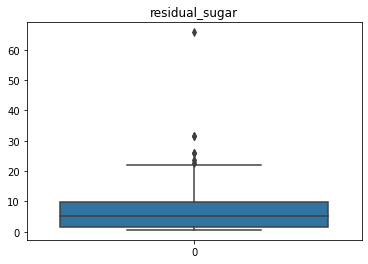

In [30]:
sns.boxplot(data=white.residual_sugar);
plt.title("residual_sugar")

Text(0.5, 1.0, 'chlorides')

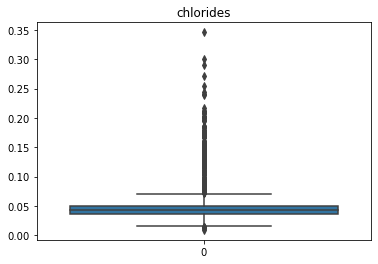

In [42]:
sns.boxplot(data=white.chlorides);
plt.title("chlorides")

Text(0.5, 1.0, 'sulphates')

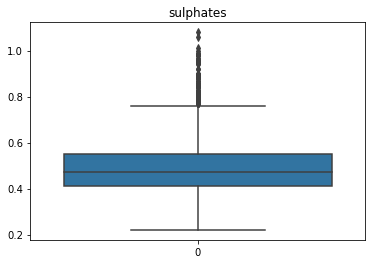

In [43]:
sns.boxplot(data=white.sulphates);
plt.title("sulphates")